# Modifed Predator-Prey Models
**(อ้างอิงตัวอย่าง 5.15)**

## การเพิ่มข้อจำกัดของทรัพยากร (Logistic Growth)
เพื่อให้แบบจำลองสะท้อนความเป็นจริงมากขึ้น เราปรับให้การเติบโตของประชากรเหยื่อไม่เป็นการเติบโตแบบยกกำลัง (Exponential Growth) แต่เป็นการเติบโตแบบลอจิสติก (Logistic Growth) ซึ่งมีข้อจำกัดตามค่าความสามารถรองรับของระบบนิเวศ \(K\) ดังนี้:

\begin{equation}
\frac{dx}{dt} = \alpha x \left( 1 - \frac{x}{K} \right) - \beta xy
\end{equation}

โดยที่ $ K $ คือความสามารถรองรับของระบบ (Carrying Capacity) ซึ่งเป็นจำนวนสูงสุดที่ทรัพยากรในระบบสามารถรองรับได้

##  การเพิ่มฟังก์ชันการตอบสนองของผู้ล่า (Holling Type II Functional Response)
ในแบบจำลองดั้งเดิม อัตราการล่าของผู้ล่าเป็นเชิงเส้นกับจำนวนเหยื่อ ซึ่งไม่สะท้อนข้อเท็จจริงที่ว่าเมื่อจำนวนเหยื่อเพิ่มขึ้นมาก ผู้ล่าจะไม่สามารถบริโภคได้ทั้งหมดเนื่องจากข้อจำกัดด้านเวลา เราจึงใช้ฟังก์ชันการตอบสนองของผู้ล่าประเภทที่สอง (Holling Type II Functional Response):

\begin{equation}
\frac{dy}{dt} = \frac{\delta xy}{1 + hx} - \gamma y
\end{equation}

โดยที่$ h$ คือเวลาที่ผู้ล่าใช้ในการล่าเหยื่อ (Handling Time) ซึ่งทำให้การล่าเหยื่อไม่สามารถเพิ่มขึ้นได้แบบไม่มีขีดจำกัด

##  แบบจำลองที่ปรับปรุงแล้ว
เมื่อรวมทั้ง Logistic Growth และ  Holling Type II Response เข้าด้วยกัน เราจะได้ระบบสมการใหม่ดังนี้:

\begin{equation}
\frac{dx}{dt} = \alpha x \left( 1 - \frac{x}{K} \right) - \frac{\beta xy}{1 + hx}
\end{equation}

\begin{equation}
\frac{dy}{dt} = \frac{\delta xy}{1 + hx} - \gamma y
\end{equation}

 แบบจำลองนี้สะท้อนถึงปัจจัยที่เป็นข้อจำกัดของระบบนิเวศและการเปลี่ยนแปลงจำนวนประชากรในรูปแบบที่สมจริงมากขึ้น

--------------

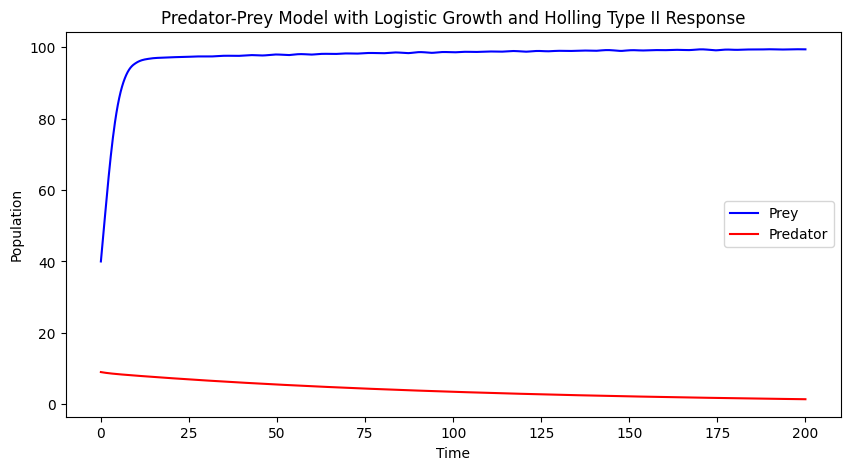

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ค่าพารามิเตอร์
alpha = 0.5
beta = 0.02
delta = 0.01
gamma = 0.1
K = 100
h = 0.1

# ระบบสมการเชิงอนุพันธ์
def predator_prey(t, z):
    x, y = z
    dxdt = alpha * x * (1 - x/K) - (beta * x * y) / (1 + h*x)
    dydt = (delta * x * y) / (1 + h*x) - gamma * y
    return [dxdt, dydt]

# เงื่อนไขเริ่มต้น
x0, y0 = 40, 9
t_span = (0, 200)
t_eval = np.linspace(*t_span, 1000)

# แก้สมการเชิงอนุพันธ์
sol = solve_ivp(predator_prey, t_span, [x0, y0], t_eval=t_eval)

# แสดงผลลัพธ์
plt.figure(figsize=(10,5))
plt.plot(sol.t, sol.y[0], label="Prey", color="blue")
plt.plot(sol.t, sol.y[1], label="Predator", color="red")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Predator-Prey Model with Logistic Growth and Holling Type II Response")
plt.show()
